### Model Training

#### 1.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/Car_Details.csv')

#### Show Top 5 Records

In [3]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,No_of_years
0,450000,145500,Diesel,Individual,Manual,First Owner,5.0,2000,23.40,1248.0,74.00,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,21.14,1498.0,103.52,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,2700,17.70,1497.0,78.00,17
3,225000,127000,Diesel,Individual,Manual,First Owner,5.0,2750,23.00,1396.0,90.00,13
4,130000,120000,Petrol,Individual,Manual,First Owner,5.0,4500,16.10,1298.0,88.20,16


In [26]:
df['No_of_years'].describe()

count    7906.000000
mean        9.016064
std         3.863695
min         3.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        29.000000
Name: No_of_years, dtype: float64

In [27]:
df['No_of_years'].max()

29

#### Preparing X and Y variables

In [8]:
X = df.drop(columns=['selling_price'],axis=1)

In [9]:
y = df['selling_price']

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6324, 21), (1582, 21))

#### Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 453276.9171
- Mean Absolute Error: 271504.2024
- R2 Score: 0.6856
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 463377.1661
- Mean Absolute Error: 268411.2459
- R2 Score: 0.6912




c:\Users\iqbal\Car Selling Prediction\CarSelling\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.629e+12, tolerance: 4.133e+11
  model = cd_fast.enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 452875.5793
- Mean Absolute Error: 272332.3288
- R2 Score: 0.6861
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 463177.3167
- Mean Absolute Error: 269083.1737
- R2 Score: 0.6914


Ridge
Model performance for Training set
- Root Mean Squared Error: 453017.4882
- Mean Absolute Error: 272667.0070
- R2 Score: 0.6859
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 461564.8731
- Mean Absolute Error: 268989.3690
- R2 Score: 0.6936


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 154403.8994
- Mean Absolute Error: 72611.0227
- R2 Score: 0.9635
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 179161.8160
- Mean Absolute Error: 89621.4078
- R2 Score: 0.9538


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 15350.1520
- Mean Absolut

#### Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.983286
5,Random Forest Regressor,0.981671
6,XGBRegressor,0.980529
4,Decision Tree,0.967425
3,K-Neighbors Regressor,0.953833
8,AdaBoost Regressor,0.838504
2,Ridge,0.693589
1,Lasso,0.691445
0,Linear Regression,0.691178


#### Catboost Regressor

In [17]:
catboost_model = CatBoostRegressor(verbose=False)
catboost_model = catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.33


#### Plot y_pred and y_test

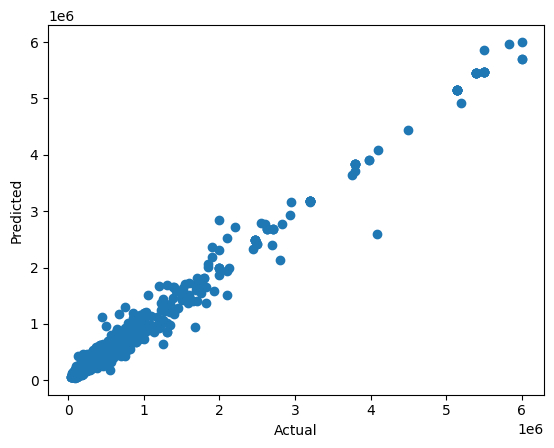

In [18]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

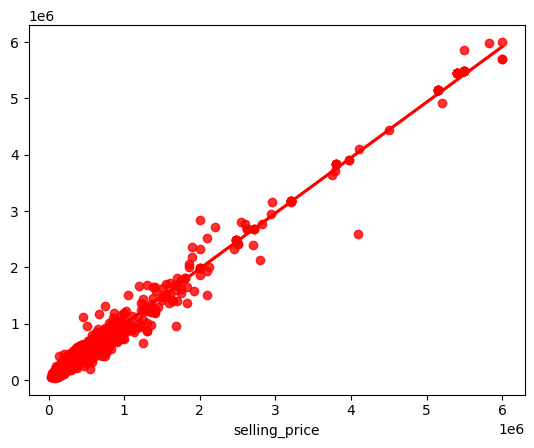

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
3641,501000,4.635068e+05,37493.205534
5531,440000,5.373356e+05,-97335.649474
3524,140000,1.871012e+05,-47101.213484
7478,476999,4.510373e+05,25961.723711
3455,620000,6.156114e+05,4388.554819
...,...,...,...
1317,330000,4.317186e+05,-101718.595368
622,229999,2.946891e+05,-64690.072532
1419,144000,2.189317e+05,-74931.686840
4287,2711000,2.681199e+06,29800.958304


In [ ]:
# Save the trained model as a pickle string.

import pickle

saved_model = pickle.dump(catboost_model, open('CarSelling.pickle','wb'))